# Development and Testing Notebook for Elastic Data Factory Library

## This notebook serves as a testing bed for packages and utilities created as part of EDF library lifecycle

### Import packages for data wrangling and plotting

In [26]:
# import unctions for interacting with the operating system
import os
# import sys functions and variables to manipulate Python runtime environment
import sys
# import AWS SDK for Python
import boto3

### Change working directory

In [3]:
%cd '/root/Elastic-Data-Factory'
print('Current Working Directory: ', os.getcwd())

/root/Elastic-Data-Factory
Current Working Directory:  /root/Elastic-Data-Factory


### Install additional packages

In [27]:
pip uninstall Elastic-Data-Factory -y

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip cache purge

Files removed: 50
Note: you may need to restart the kernel to use updated packages.


In [29]:
#%%capture
!{sys.executable} -m pip install Elastic-Data-Factory --no-cache-dir --index-url https://private.artifactory.foc.zone/artifactory/api/pypi/rdf-pypi-virtual/simple --extra-index-url https://private.artifactory.foc.zone/artifactory/api/pypi/pypi-remote/simple

Looking in indexes: https://private.artifactory.foc.zone/artifactory/api/pypi/rdf-pypi-virtual/simple, https://private.artifactory.foc.zone/artifactory/api/pypi/pypi-remote/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 204.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 147.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 229.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 206.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 210.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 203.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 217.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.

### Upgrade Existing Packages

In [30]:
%%capture
# mute output above
!{sys.executable} -m pip install tqdm --upgrade --index-url https://private.artifactory.foc.zone/artifactory/pypi-local --extra-index-url https://private.artifactory.foc.zone/artifactory/api/pypi/pypi-remote/simple

In [31]:
# import AWS SDK for pandas to integrate dataframes with several AWS Services
import awswrangler as wr
# import pandas for relational data analysis and manipulation
import pandas as pd
# import numpy to create and manipulate arrays
import numpy as np
# import date module to get current date
from datetime import date
# import matplotlib for plotting
import matplotlib.pyplot as plt
# import importlib for module reload
from importlib import reload
# import elastic data factory query wrapper
from elasticdatafactory.data import make_dataset
# import utility functions
from elasticdatafactory.utilities import utility
# import plot data class for data visualization
from elasticdatafactory.plots import plotter

In [8]:
from glob import glob

In [9]:
import elasticdatafactory
elasticdatafactory.__version__

'N/A'

In [8]:
dir(elasticdatafactory)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__git_commit_id__',
 '__git_remote__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__warningregistry__',
 'abspath',
 'data',
 'dirname',
 'exists',
 'f',
 'git_id_path',
 'git_remote_path',
 'join',
 'logging',
 'package_path',
 'plots',
 'setup_custom_logger',
 'utilities',
 'version_path']

### Reload development modules (Optional)

In [145]:
reload(plotter)
reload(utility)
reload(make_dataset)

<module 'elasticdatafactory.data.make_dataset' from '/opt/conda/lib/python3.10/site-packages/elasticdatafactory/data/make_dataset.py'>

In [44]:
def create_tree(path, parent=None, tree=None, display=True):
    
    """Provides an overview of project directories and files 
    in the form of a tree data structure

    Parameters
    ----------
    path : str
        A path to project folder containing all directories, sub-directories, and files
    parent : str
        Represents name of a parent node for a child node, by default it is set to None
    tree : Tree()
        A Tree object created through Treelib opensource library, by default it is None
        Source: https://treelib.readthedocs.io/en/latest/
    display : bool
        Displays Tree Data Structure when set to True
    
    Returns
    -------
    tree : Tree()
        A Tree object created through Treelib opensource library
        
    Examples
    --------
    # Create a tree object
    create_tree(path='root/path_to_project/')
    # Optional arguments
    create_tree(path='root/path_to_project/', parent='parent-node', tree=Tree())
    

    """

    if parent is None:
        parent = os.path.basename(os.path.dirname(path)).lower()
    if tree is None:
        # create tree object
        tree = Tree()
        # create the root node
        tree.create_node(os.path.basename(os.path.dirname(path)).title(), os.path.basename(os.path.dirname(path)).lower())
    elif tree.root is None:
        # create the root node
        tree.create_node(os.path.basename(os.path.dirname(path)).title(), os.path.basename(os.path.dirname(path)).lower())
    
    if os.path.isdir(path) == True:
        # populate all directories and sub-directories
        dir_names = [os.path.basename(os.path.dirname(dir)) for dir in glob(path + '[!_]*/', recursive=True) if os.path.isdir(dir)]
        for directory in dir_names:
            tree.create_node(directory, directory.lower(), parent=parent)
        # populate files within each directory
        file_names = [os.path.basename(dir) for dir in glob(path + '[!_]*', recursive=True) if not os.path.isdir(dir)]
        for file in file_names:
            tree.create_node(file, parent=parent)
        if display is True:
            # display tree data structure
            tree.show()
    
    return tree

In [9]:
# Create root node
tree = utility.create_tree(path='/root/Elastic-Data-Factory/', parent='elastic-data-factory', tree=None, display=False)

In [12]:
for path in glob('/root/Elastic-Data-Factory/**/*[!_]/', recursive=True):
    # Create root node
    tree = utility.create_tree(path=path, parent=None, tree=tree, display=False)

In [13]:
tree.show()

Elastic-Data-Factory
├── CHANGELOG.md
├── LICENSE
├── MANIFEST.in
├── Makefile
├── README.md
├── docs
│   ├── CODEOWNERS
│   ├── Makefile
│   ├── commands.rst
│   ├── conf.py
│   ├── getting-started.rst
│   ├── index.md
│   ├── index.rst
│   ├── make.bat
│   └── notebooks.rst
├── elasticdatafactory
│   ├── VERSION
│   ├── data
│   │   ├── field_query_mapping.json
│   │   ├── make_dataset.py
│   │   ├── query_db_map.json
│   │   └── query_registry.py
│   ├── features
│   │   └── build_features.py
│   ├── plots
│   │   └── plotter.py
│   ├── trainers
│   │   ├── predict_model.py
│   │   ├── train_deploy.py
│   │   └── train_model.py
│   └── utilities
│       ├── helper.py
│       └── utility.py
├── logger.log
├── make.bat
├── mkdocs.yml
├── models
├── notebooks
│   ├── data_wrangling_jenna.ipynb
│   ├── develop_test_EDF.ipynb
│   ├── logger.log
│   ├── long_time_frame_to_buy.ipynb
│   └── query_web_events_wwen.ipynb
├── pyproject.toml
├── references
├── reports
│   └── figures
├── requir

### Create session to store configuration state and service clients

In [10]:
# create session and set environment variables
session = boto3.Session()
s3 = boto3.resource('s3')
wr.config.sts_endpoint_url = "https://sts." + session.region_name + ".amazonaws.com"
os.environ['AWS_DEFAULT_REGION'] = 'us-east-2' # specify your AWS region.
# create new `pandas` methods which use `tqdm` progress
#tqdm.pandas()

### Universal Arguments for Data Queries Through Elastic Data Factory (EDF)

In [11]:
start_date = '2021-11-28' # YYYY-MM-DD Format
end_date = '2021-11-28'
loan_purpose = ''
required_args = {'limit': 'ALL',
                 'workgroup': 'rcd-datascientist',
                 'output_filepath': None}

### Major Milestone Data (loan_major_milestone_fact)

In [16]:
df_milestone = make_dataset.main.callback(**{**required_args,
                                             **{'query_label': 'QueryMajorMilestone',
                                                'start_date': start_date,
                                                'end_date': end_date,
                                                'database': 'rm_northstar_raw_processed_access',
                                                'edit_mode': False
                                               }
                                            })

2023-02-10 20:37:14,486 [INFO] make_dataset.py/get_data:351 >> [INFO] detecting IDE to create appropriate editing mode
2023-02-10 20:37:14,496 [INFO] make_dataset.py/get_data:357 >> [INFO] module executed in query edit mode


In [18]:
utility.data_profile(df_milestone)

2023-02-10 20:37:49,494 [INFO] utility.py/data_profile:824 >> [INFO] finding valid entries...


  0%|          | 0/253792 [00:00<?, ?it/s]

2023-02-10 20:37:49,872 [INFO] utility.py/data_profile:828 >> [INFO] finding unique entries...
2023-02-10 20:37:49,900 [INFO] utility.py/data_profile:831 >> [INFO] finding duplicate keys...


  0%|          | 0/4 [00:00<?, ?it/s]

2023-02-10 20:37:49,972 [INFO] utility.py/data_profile:837 >> [INFO] finding NaN entries...


  0%|          | 0/4 [00:00<?, ?it/s]

2023-02-10 20:37:50,030 [INFO] utility.py/data_profile:840 >> [INFO] finding minimum and maximum entries...


  0%|          | 0/4 [00:00<?, ?it/s]

2023-02-10 20:37:50,086 [INFO] utility.py/data_profile:851 >> [INFO] inspecting data types...


  0%|          | 0/4 [00:00<?, ?it/s]

,Feature,Entries,Unique,Duplicate Keys,Null,Minimum,Maximum,Data Type
0,loanidentifierdimsk,63448,40518,11078,0,11125472,231961072,Int64
1,loanmilestonesk,63448,15,15,0,1,133,Int32
2,loanmilestone_eventname,63448,15,15,0,Allocated,VAL,string
3,loanmilestone_groupname,63448,11,11,0,Allocated,VAL,string


2022-12-27 21:13:08,068 [WARNING] legend.py/_parse_legend_args:1236 >> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2022-12-27 21:13:08,332 [WARNING] legend.py/_parse_legend_args:1236 >> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


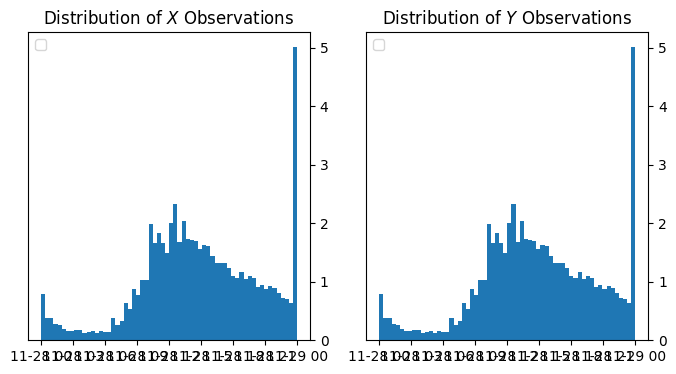

In [18]:
plotter.plot_histogram(x=df_milestone['estdatetime'].values, y=df_milestone['estdatetime'].values, xlabel='', ylabel='', hist_type='univariate', nrows=1, ncols=1)

In [19]:
print('\nNo. of loan milestone records:', df_milestone.shape[0])


No. of loan milestone records: 63448


In [20]:
df_milestone.head()

,loanidentifierdimsk,loanmilestonesk,loanmilestone_eventname,loanmilestone_groupname,estdatetime
0,212007506,1,Idle Pulled Credit,Offline Credit,2021-11-28 00:42:45
1,212013567,1,Idle Pulled Credit,Offline Credit,2021-11-28 11:00:32
2,212015486,1,Idle Pulled Credit,Offline Credit,2021-11-28 11:03:53
3,212016426,1,Idle Pulled Credit,Offline Credit,2021-11-28 11:38:58
4,212018272,1,Idle Pulled Credit,Offline Credit,2021-11-28 12:56:38


In [21]:
df_milestone['loanmilestone_groupname'].value_counts()

Lead              32183
Allocated          9323
Net Leads          5587
Offline Credit     5495
Closing            4906
Soft Credit        2022
Online Credit      1437
Application        1045
PAL                 713
Folder              653
VAL                  84
Name: loanmilestone_groupname, dtype: Int64

In [22]:
df_milestone['loanmilestonesk'].value_counts()

7      26596
9       9182
6       5587
17      5587
8       4906
1       2591
120     2181
133     2022
2       1437
80      1045
124      723
3        713
4        653
121      141
129       84
Name: loanmilestonesk, dtype: Int64

In [50]:
reload(utility)

<module 'elasticdatafactory.utilities.utility' from '/root/Elastic-Data-Factory/elasticdatafactory/utilities/utility.py'>

In [146]:
df = pd.DataFrame({'A': ['a', 'b', np.nan], 'B': ['b', 'a', 'c'], 'C': ['x', 'y', 'z'],
                   'D': [1, 2, np.nan]})

In [147]:
df

,A,B,C,D
0,a,b,x,1.0
1,b,a,y,2.0
2,NaN,c,z,NaN


In [148]:
df.dtypes

A     object
B     object
C     object
D    float64
dtype: object

In [149]:
df['A'] = df['A'].astype('string')

In [150]:
cle = utility.LabelEncoderCustom()

In [151]:
encoded_data  = cle.fit_transform(df, 
                                  categorical_columns=['A', 'B', 'C', 'D'],
                                  ordinal_columns=['B'],
                                  cat_order={'B': ['a','b','c']},
                                  drop_single_label=True, 
                                  nan_strategy='replace', 
                                  nan_replace_value=0)

2023-02-17 00:54:02,586 [INFO] utility.py/fit_transform:1150 >> [INFO] nan_replace_value <nan_replace_value> is transformed to a string data type
2023-02-17 00:54:02,602 [INFO] utility.py/fit_transform:1180 >> [INFO] using user-defined categorical columns for label encoding...


  0%|          | 0/4 [00:00<?, ?it/s]

In [152]:
cle.get_params()

{'B': {1: 'b', 0: 'a', 2: 'c'},
 'A': ['A_0', 'A_a', 'A_b'],
 'C': ['C_x', 'C_y', 'C_z'],
 'D': ['D_1.0', 'D_2.0', 'D_0']}

In [14]:
df = pd.DataFrame({'A': ['a', 'a'], 'B': ['b', 'a'], 'C': ['y', 'z'],
                   'D': [1, 2]})

In [27]:
transform = cle.transform_from_estimators(df, cle.get_params())
transform

  0%|          | 0/4 [00:00<?, ?it/s]

,A,B,C_x,C_y,C_z,D_1,D_2,D_3
0,0,1,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0
2,0,2,0,0,1,0,0,1


In [ ]:
transform = cle.transform(df)
transform.head()

  0%|          | 0/4 [00:00<?, ?it/s]

,A,B_a,B_b,B_c,C_x,C_y,C_z,D
0,0,0,1,0,1,0,0,1
1,1,1,0,0,0,1,0,2
2,0,0,0,1,0,0,1,3


In [475]:
cle.inverse_transform(transform)

  0%|          | 0/2 [00:00<?, ?it/s]

,A,B,C,D,E
0,a,b,x,1,x
1,b,a,y,2,y
2,a,c,z,3,z


In [28]:
def create_new_cell(contents):
    shell = get_ipython()
    payload = dict(
        source='set_next_input',
        text=contents,
        replace=False,
    )
    shell.payload_manager.write_payload(payload, single=False)

In [79]:
def get_callback_function(query_label: str, database: str) -> str:
    """Function creates a callback function string
    """
    content = """df_milestone = make_dataset.main.callback(**
                                        {**required_args,
                                            **{'query_label': '%s',
                                                'start_date': start_date,
                                                'end_date': end_date,
                                                'database': '%s',
                                                'edit_mode': True,
                                                'custom_query': query
                                                }
                                            }
                                        )""" %(query_label, database)
    return content

In [80]:
query_label = 'QueryMajorMilestone'
database = 'rm_northstar_raw_processed_access'
create_new_cell(get_callback_function(query_label, database))

In [32]:
    required_args = {'limit': 'ALL',
                     'workgroup': 'rcd-datascientist',
                     'output_filepath': None}
    df_leadform_input = make_dataset.main.callback(**{**required_args,
                                                      **{'query_label': 'QueryAdobeLeadformInput',
                                                         'start_date': '2022-12-01',
                                                         'end_date': '2022-12-02',
                                                         'loan_purpose': '',
                                                         'group_id': '',
                                                         'site_sections': ['ql lander', 'rocket lander'],
                                                         'database': "rktdp_adobe_omniture_raw_processed_access"}
                                                     })
    print('\nNo. of leadform input records:', df_leadform_input.shape[0])

2023-02-22 05:48:46,420 [INFO] make_dataset.py/get_data:327 >> [INFO] data acquisition in progress...



No. of leadform input records: 84216
